# TOP 500 supercomputer mining - Challenge 2

In this challenge use Pandas to read the search results data in your MySQL table. Create a DataFrame that contains all the search results, then generate a data visualization plot (or several) from the DataFrame.

Try to answer the following questions:

* Is there a relationship between year and consumed power?
* And between power and cores?
* Which is the company with more supercomputers?
* Which country have more computacional power?
* The computacional power has increased over the years?

In [ ]:
# Your code here

In [1]:
import mysql.connector 
import pandas as pd                   
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
LOCALHOST, USER, PASSWD, DATABASE = 'localhost', 'root', '1234567', 'SuperComputers'

db = mysql.connector.connect(host=LOCALHOST, user=USER, passwd=PASSWD, database=DATABASE)

cursor = db.cursor()

cursor.execute('select * from top_500')

data = cursor.fetchall()

In [5]:
data

[(1,
  'Tianhe-2A',
  2014,
  'National Super Computer Center in Guangzhou Cluster  Intel Xeon E5-2692 12C 2.200GHz  TH Express-2',
  'NUDT',
  'China',
  3120000,
  33862.7,
  54902.4,
  17808),
 (2,
  'Titan',
  2014,
  'DOE/SC/Oak Ridge National Laboratory XK7  Opteron 6274 16C 2.200GHz  Cray Gemini interconnect',
  'Cray Inc.',
  'United States',
  560640,
  17590.0,
  27112.5,
  8209),
 (3,
  'Sequoia',
  2014,
  'DOE/NNSA/LLNL BlueGene/Q  Power BQC 16C 1.60 GHz  Custom',
  'IBM',
  'United States',
  1572864,
  17173.2,
  20132.7,
  7890),
 (4,
  'K computer',
  2014,
  'RIKEN Advanced Institute for Computational Science (AICS) computer  SPARC64 VIIIfx 2.0GHz  Tofu interconnect',
  'Fujitsu',
  'Japan',
  705024,
  10510.0,
  11280.4,
  12660),
 (5,
  'Mira',
  2014,
  'DOE/SC/Argonne National Laboratory BlueGene/Q  Power BQC 16C 1.60GHz  Custom',
  'IBM',
  'United States',
  786432,
  8586.6,
  10066.3,
  3945),
 (6,
  'Piz Daint',
  2014,
  'Swiss National Supercomputing Centr

In [4]:
cursor.column_names

('ranking',
 'name',
 'year',
 'description',
 'company',
 'country',
 'cores',
 'rmax',
 'rpeak',
 'power')

In [6]:
df = pd.DataFrame(data, columns=cursor.column_names)

print ('Data readed from MySQL.')

display (df.head())

Data readed from MySQL.


,ranking,name,year,description,company,country,cores,rmax,rpeak,power
0,1,Tianhe-2A,2014,National Super Computer Center in Guangzhou Cl...,NUDT,China,3120000,33862.7,54902.4,17808
1,2,Titan,2014,DOE/SC/Oak Ridge National Laboratory XK7 Opte...,Cray Inc.,United States,560640,17590.0,27112.5,8209
2,3,Sequoia,2014,DOE/NNSA/LLNL BlueGene/Q Power BQC 16C 1.60 G...,IBM,United States,1572864,17173.2,20132.7,7890
3,4,K computer,2014,RIKEN Advanced Institute for Computational Sci...,Fujitsu,Japan,705024,10510.0,11280.4,12660
4,5,Mira,2014,DOE/SC/Argonne National Laboratory BlueGene/Q ...,IBM,United States,786432,8586.6,10066.3,3945


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 10 columns):
ranking        2498 non-null int64
name           2498 non-null object
year           2498 non-null int64
description    2498 non-null object
company        2498 non-null object
country        2498 non-null object
cores          2498 non-null int64
rmax           2498 non-null float64
rpeak          2498 non-null float64
power          2498 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 195.3+ KB


In [8]:
df.describe()

,ranking,year,cores,rmax,rpeak,power
count,2498.000000,2498.000000,2.498000e+03,2498.000000,2498.000000,2498.000000
mean,250.453563,2016.000400,8.969975e+04,1464.098078,2263.688911,960.138911
std,144.391404,1.414921,5.773699e+05,5373.809216,7651.921270,1921.506775
min,1.000000,2014.000000,2.992000e+03,152.900000,170.400000,0.000000
25%,125.250000,2015.000000,1.974000e+04,363.200000,572.375000,0.000000
50%,250.500000,2016.000000,3.308800e+04,717.400000,1112.900000,387.000000
75%,375.000000,2017.000000,5.760000e+04,1144.800000,2072.650000,1012.000000
max,500.000000,2018.000000,1.986000e+07,143500.000000,200795.000000,19431.000000


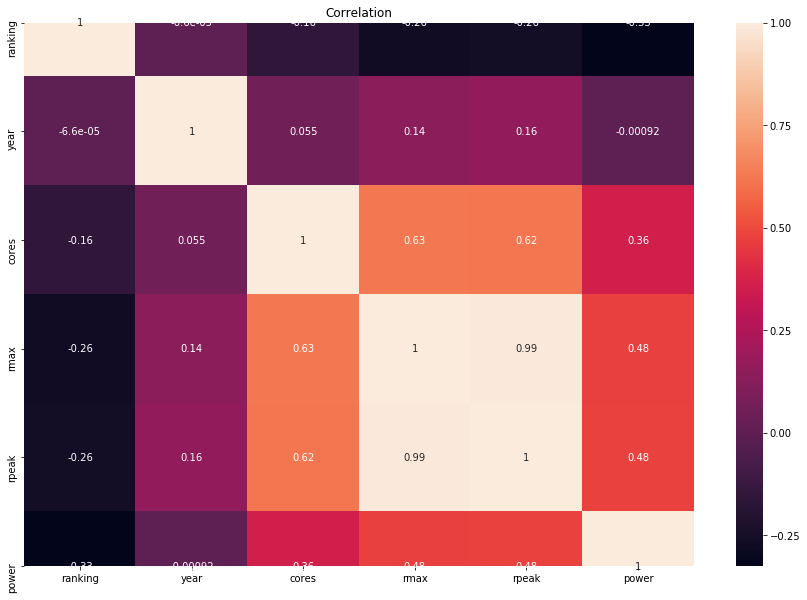

In [12]:
plt.figure(figsize=(15,10))
plt.title('Correlation')
sns.heatmap(df.corr(), annot=True);

# Is there a relationship between year and power?

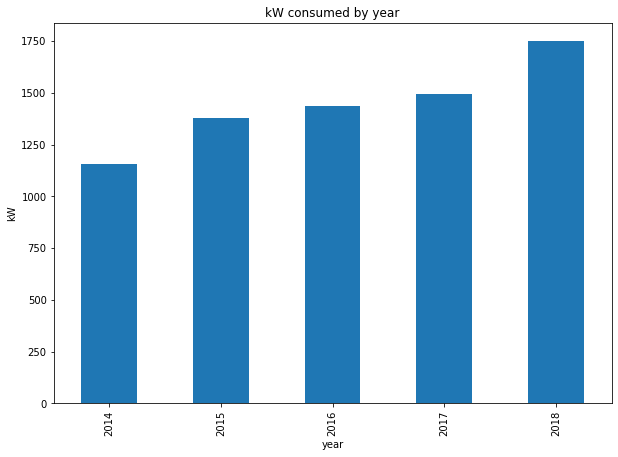

In [19]:
by_year = df[df['power']>0].groupby('year').mean()

plt.figure(figsize=(10,7))
plt.title('kW consumed by year')
plt.ylabel('kW')
by_year.power.plot.bar();

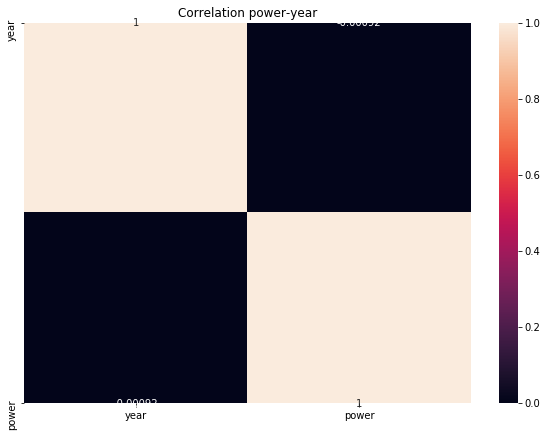

In [20]:
df_year_kw = df[['year', 'power']]

plt.figure(figsize=(10,7))
plt.title('Correlation power-year')
sns.heatmap(df_year_kw.corr(), annot=True);

Apparently, there is no correlation between year and consumed power, but from 2016 to 2018 the power needed for the top 500 supercomputers has descended, almost to 2014 levels.


# Is there a relationship between power and cores?

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Correlation power-cores (Pearson)')
sns.heatmap(df[['power', 'cores']].corr(method='pearson'), annot=True);

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Correlation power-cores (Spearman)')
sns.heatmap(df[['power', 'cores']].corr(method='spearman'), annot=True);

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Correlation power-cores (Kendall)')
sns.heatmap(df[['power', 'cores']].corr(method='kendall'), annot=True);

Seems like there is linear and non-linear correlation between power and cores, not much significant, but Pearson correlation in 0.36 and Spearman correlation in 0.47, meaning that to increase cores in a computer implies more power requeriments.

# Which is the company with more supercomputers?

In [21]:
df.company.value_counts().head()

HPE          696
Lenovo       338
Cray Inc.    289
IBM          243
Sugon        206
Name: company, dtype: int64

The 5 companies with more supercomputers are HPE, Lenovo, CRay Inc., IBM and Sugon.

# Which country have more computacional power?

In [ ]:
by_country=df.groupby('country').sum().reset_index()
by_country.head()

In [26]:
by_country.sort_values(by='rmax', ascending=False).head()

,country,ranking,year,cores,rmax,rpeak,power
36,United States,209639,1721362,60632654,1320502.9,1917610.4,989480
6,China,225318,1554759,85350592,1101646.7,2015140.2,674576
19,Japan,31385,326588,41421046,318264.0,466611.9,256141
12,Germany,28012,258018,7624156,185388.8,246950.9,99352
35,United Kingdom,20181,193513,5781492,128568.4,159419.6,61716


In [23]:
by_country.loc[by_country.rmax==list(by_country.rmax.sort_values(ascending=False))[0]].country

36    United States
Name: country, dtype: object

In [ ]:
by_country.loc[by_country.rpeak==list(by_country.rpeak.sort_values(ascending=False))[0]].country

In [ ]:
by_country.loc[by_country.cores==list(by_country.cores.sort_values(ascending=False))[0]].country

The country with the highest R-Max is USA, but the country with more R-Peak and more cores is China.

# The computacional power has increased over the years?

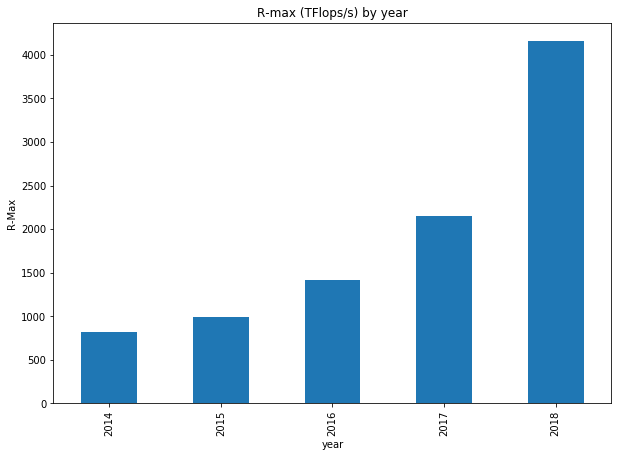

In [27]:
plt.figure(figsize=(10,7))
plt.title('R-max (TFlops/s) by year')
plt.ylabel('R-Max')
by_year.rmax.plot.bar();

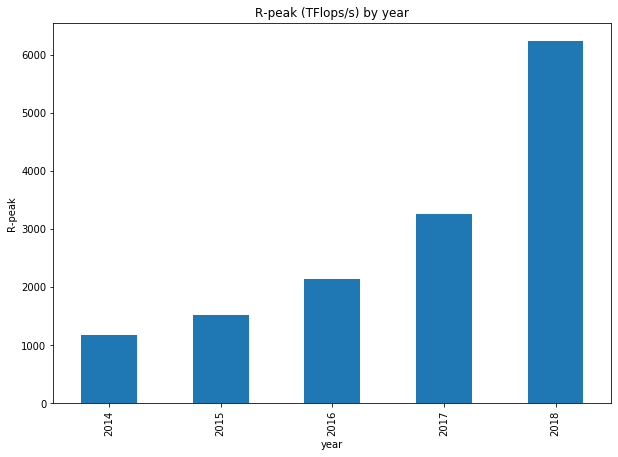

In [28]:
plt.figure(figsize=(10,7))
plt.title('R-peak (TFlops/s) by year')
plt.ylabel('R-peak')
by_year.rpeak.plot.bar();

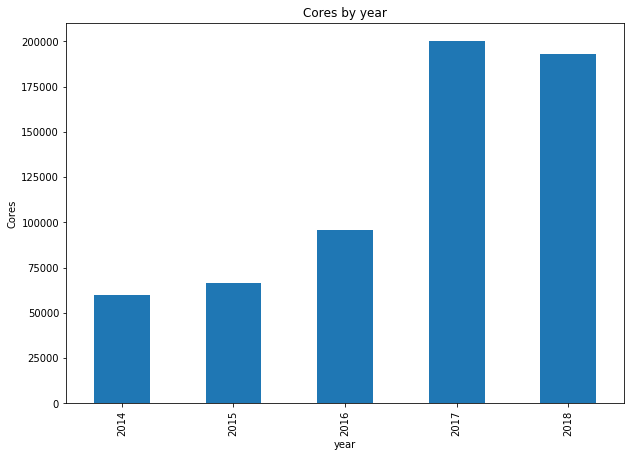

In [29]:
plt.figure(figsize=(10,7))
plt.title('Cores by year')
plt.ylabel('Cores')
by_year.cores.plot.bar();

R-Max and R-Peak are increasing over the years. However, the cores number in 2018 are less than in previous years.